In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()


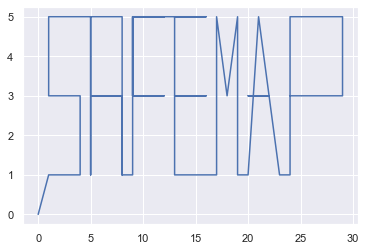

In [29]:
x=[0,1,2,3,4,4,4,3,2,1,1,1,2,3,4,5,5,5,5,5,5,7,8,8,8,8,8,8,8,7,6,5,6,7,8,8,8,9,9,9,9,9,10,11,12,9,9,12,9,9,16,13,13,16,13,13,16,17,17,18,19,19,20,21,22,20,22,23,24,24,29,29,24]
y=[0,1,1,1,1,2,3,3,3,3,4,5,5,5,5,5,1,2,3,4,5,5,5,4,3,2,1,2,3,3,3,3,3,3,3,2,1,1,2,3,4,5,5,5,5,5,3,3,3,5,5,5,3,3,3,1,1,1,5,3,5,1,1,5,3,3,3,1,1,5,5,3,3]

plt.plot(x, y)

Load File

In [30]:
fakeTrafficDF=df=pd.read_excel("C:/Users/Documents/{{My Documents}}/SachinUV/Inspiring/UltraMap/gpsDataFakeTraffic.xlsx")
fakeTrafficDF.head(10)

,Track,AnonymousSourceID,SourceLatitude&Longitude,Acceleration_Trend(Km/Hour),Date,Time,Region
0,1,ASI1,"19.11459028345533, 72.91347968426044",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
1,2,ASI2,"19.11460295809472, 72.91348167990229",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
2,3,ASI3,"19.114605492420406, 72.91348503267164",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
3,4,ASI4,"19.114604225258866, 72.91348235045733",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
4,5,ASI5,"19.114604858841655, 72.91348167990517",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
5,6,ASI6,"19.11460549242176, 72.91348369156543",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
6,7,ASI7,"19.114607393169727, 72.91348235046249",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
7,8,ASI8,"19.114604858839833, 72.91348369156414",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
8,9,ASI9,"19.114609927499014, 72.91348235046605",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
9,10,ASI10,"19.114609927499476, 72.91348167991326",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"


In [31]:
#Taking only important columns:
X=fakeTrafficDF.loc[:,['AnonymousSourceID','SourceLatitude&Longitude','Acceleration_Trend(Km/Hour)']]


In [32]:
#Splitting SourceLatitude&Longitude columns, this will be helpful in calculating area
X[['SourceLatitude','SourceLongitude']] = X['SourceLatitude&Longitude'].str.split(',',expand=True)

In [33]:
#Deleting SourceLatitude&Longitude column
del X['SourceLatitude&Longitude']

In [34]:
X.head(10)

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude
0,ASI1,5,19.11459028345533,72.91347968426044
1,ASI2,5,19.11460295809472,72.91348167990229
2,ASI3,5,19.114605492420406,72.91348503267164
3,ASI4,5,19.114604225258866,72.91348235045733
4,ASI5,5,19.114604858841655,72.91348167990517
5,ASI6,5,19.11460549242176,72.91348369156543
6,ASI7,5,19.114607393169727,72.91348235046249
7,ASI8,5,19.114604858839833,72.91348369156414
8,ASI9,5,19.114609927499014,72.91348235046605
9,ASI10,5,19.114609927499476,72.91348167991326


Let's create cluster

In [35]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X[X.columns[1:4]]) # Compute k-means clustering. 

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:4]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:4]]) # Labels of each point

X.head(100)

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
0,ASI1,5,19.11459028345533,72.91347968426044,0
1,ASI2,5,19.11460295809472,72.91348167990229,0
2,ASI3,5,19.114605492420406,72.91348503267164,0
3,ASI4,5,19.114604225258866,72.91348235045733,0
4,ASI5,5,19.114604858841655,72.91348167990517,0
5,ASI6,5,19.11460549242176,72.91348369156543,0
6,ASI7,5,19.114607393169727,72.91348235046249,0
7,ASI8,5,19.114604858839833,72.91348369156414,0
8,ASI9,5,19.114609927499014,72.91348235046605,0
9,ASI10,5,19.114609927499476,72.91348167991326,0


K-means really worked well and given us 2 clusters from data points. Both clusters consists of same source of GPS signals however at different geo points

Now let's calculate length and breadth of these clusters and then area

In [36]:
X_filtered=X.loc[X['cluster_label'] == 0]
X_filtered.head(10)

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
0,ASI1,5,19.11459028345533,72.91347968426044,0
1,ASI2,5,19.11460295809472,72.91348167990229,0
2,ASI3,5,19.114605492420406,72.91348503267164,0
3,ASI4,5,19.114604225258866,72.91348235045733,0
4,ASI5,5,19.114604858841655,72.91348167990517,0
5,ASI6,5,19.11460549242176,72.91348369156543,0
6,ASI7,5,19.114607393169727,72.91348235046249,0
7,ASI8,5,19.114604858839833,72.91348369156414,0
8,ASI9,5,19.114609927499014,72.91348235046605,0
9,ASI10,5,19.114609927499476,72.91348167991326,0


Now lets try to calculate length of cluster 0. For this we will sort SourceLongitude column and find out minimum and maximum Longitude co-ordinates. This will provide us co-ordinates for length. Same step we will do for SourceLatitude column. This will provide us co-ordinates for breadth. Then we will put these co-ordinates in our distance function to calculate length and breadth, from this we can calculate area.

In [37]:
min_SourceLongitude=X_filtered['SourceLongitude'].min()
min_SourceLongitude

' 72.9134789977002'

In [38]:
max_SourceLongitude= X_filtered['SourceLongitude'].max()
max_SourceLongitude

' 72.91348771488344'

In [39]:
min_SourceLatitude=X_filtered['SourceLatitude'].min()
min_SourceLatitude

'19.11459028345533'

In [40]:
max_SourceLatitude= X_filtered['SourceLatitude'].max()
max_SourceLatitude

'19.114610561080944'

Now we can use 2 methods for calculating distance between 2 GPS co-ordinates. One is using Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) and another one is  Vincenty distance(https://en.wikipedia.org/wiki/Vincenty%27s_formulae). But after reading certain blogs I came to know that  Vincenty distance is more accurate in compare to Haversine formula  

In [41]:
#Calculation on basis of  Vincenty distance
import geopy.distance

#Calculating length:
coords_1 = (0,72.9134789977002)
coords_2 = (0,72.91348771488344)


length=geopy.distance.distance(coords_1, coords_2).km
length_feet=length*3280.8
print ("Length in km: ", length)
print("Length in feet: ",length_feet)

#Calculating breadth

coords_1 = (19.11459028345533,0)
coords_2 = (19.114610561080944,0)


breadth=geopy.distance.distance(coords_1, coords_2).km
breadth_feet=breadth*3280.8
print ("breadth in km: ", breadth)
print("breadth in feet: ",breadth_feet)

print("Area of cluster: ", length_feet*breadth_feet)


Length in km:  0.0009703924004323924
Length in feet:  3.183663387338593
breadth in km:  0.002244600205765509
breadth in feet:  7.364084355075483
Area of cluster:  23.444765742526748


Now average City Transit Buses have average lengths of 39'2” (11.95 m), widths of 8'4” (2.55 m), heights of 9'10” (2.99 m), and have a capacity of 29 (+1) seats with standing room for 76. (https://www.dimensions.com/collection/buses#:~:text=City%20%7C%20Transit%20Buses%20have%20average,short%20to%20medium%20distance%20trips.). GPS data sources can be in bulk in buses and that's a genuine case, however if we calculate Bus area then area of average Bus (considering one dimension, just length and breadth) is 11.95 m * 2.55 m =  30.47 square meter or 99.96 square feet. Our area of cluster (23.444765742526748) is quite less than this area of average Bus (99.96). This shows that more number of GPS sources are available in small area. Hence this is our first proof of fake traffic.

Another major challenge is to nullify or lower impact of bulk GPS data sources contributing to traffic. For example a Bus having 100 passengers out of which 25-40 passengers are using Map services, can impact traffic algorithm a lot. And if for some unforseen reason Bus is running slow then traffic algo may think this as a reason for traffic though other vehicles are running at good speed. So let us see how we can minimize impact of bulk GPS data providers available in a single mode of travel and seggregating signals in one signal per cluster. By the way idea here is that whether there is one GPS data provider or multiple, in a bus quantum of all data is same, because all of them will be travelling at same speed so there is no sense of considering data from all passengers and also one Bus may not contribute to traffic and if its actually creating traffic then data from other sources should also running slow. 

For this let's load another dataset that consists of inputs from more sources as well. This data is imaginary data considering attempt of fake traffic along with inputs from normal traffic. 

In [42]:
genuineCumFakeTrafficDF=pd.read_excel("C:/Users/Documents/{{My Documents}}/SachinUV/Inspiring/UltraMap/gpsDataGenuinecumFakeTraffic.xlsx")
genuineCumFakeTrafficDF.head()

,Track,AnonymousSourceID,SourceLatitude&Longitude,Acceleration_Trend(Km/Hour),Date,Time,Region
0,1,ASI1,"19.11459028345533, 72.91347968426044",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
1,2,ASI2,"19.11460295809472, 72.91348167990229",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
2,3,ASI3,"19.114605492420406, 72.91348503267164",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
3,4,ASI4,"19.114604225258866, 72.91348235045733",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"
4,5,ASI5,"19.114604858841655, 72.91348167990517",5,21-02-2021,17:15:25,"Powai, Mumbai, MH, IN"


In [43]:
X_gcf=genuineCumFakeTrafficDF.loc[:,['AnonymousSourceID','SourceLatitude&Longitude','Acceleration_Trend(Km/Hour)']]
X_gcf[['SourceLatitude','SourceLongitude']] = X_gcf['SourceLatitude&Longitude'].str.split(',',expand=True)
del X_gcf['SourceLatitude&Longitude']
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X_gcf[X_gcf.columns[1:4]]) # Compute k-means clustering. 

X_gcf['cluster_label'] = kmeans.fit_predict(X_gcf[X_gcf.columns[1:4]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X_gcf[X_gcf.columns[1:4]]) # Labels of each point

X_gcf.head(100)

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
0,ASI1,5,19.11459028345533,72.91347968426044,0
1,ASI2,5,19.11460295809472,72.91348167990229,0
2,ASI3,5,19.114605492420406,72.91348503267164,0
3,ASI4,5,19.114604225258866,72.91348235045733,0
4,ASI5,5,19.114604858841655,72.91348167990517,0
...,...,...,...,...,...
59,ASI28,40,19.113110167796723,72.91174164069177,4
60,ASI29,41,19.11323181691779,72.9117416436281,4
61,ASI30,50,19.11310003433514,72.91156997691573,1
62,ASI31,52,19.112998660349085,72.91155924564428,1


In [44]:
from IPython.display import display, HTML

display(HTML(X_gcf.to_html()))

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
0,ASI1,5,19.11459028345533,72.91347968426044,0
1,ASI2,5,19.11460295809472,72.91348167990229,0
2,ASI3,5,19.114605492420406,72.91348503267164,0
3,ASI4,5,19.114604225258866,72.91348235045733,0
4,ASI5,5,19.114604858841655,72.91348167990517,0
5,ASI6,5,19.11460549242176,72.91348369156543,0
6,ASI7,5,19.114607393169727,72.91348235046249,0
7,ASI8,5,19.114604858839833,72.91348369156414,0
8,ASI9,5,19.114609927499014,72.91348235046605,0
9,ASI10,5,19.114609927499476,72.91348167991326,0


In [45]:
#Let's get the unique clusters:
clusterList=X_gcf.cluster_label.unique()
print(clusterList)
# type(clusterList)

[0 2 4 1 3]


In [46]:
centers = kmeans.cluster_centers_
print(centers)

[[ 4.5        19.11458436 72.91346935]
 [51.         19.11380777 72.91250975]
 [45.         19.11389457 72.91257915]
 [60.         19.11378116 72.91248326]
 [40.5        19.11387747 72.91260229]]


In [47]:
#Now let's take only one GPS source from each cluster in order to decrease magnitude of sources

In [48]:
X_gcf.loc[X_gcf['cluster_label'] == 0].sample(n = 1) 

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
17,ASI18,5,19.114607393166164,72.91348570322839,0


In [49]:
df_random_per_cluster=pd.DataFrame() 

for cluster_label_id in X_gcf.cluster_label.unique():    
    df_random_per_cluster=df_random_per_cluster.append(X_gcf.loc[X_gcf['cluster_label'] == cluster_label_id].sample(n = 1) )

df_random_per_cluster.head(10)   

,AnonymousSourceID,Acceleration_Trend(Km/Hour),SourceLatitude,SourceLongitude,cluster_label
52,ASI21,4,19.11456623371214,72.91345280605965,0
26,ASI27,45,19.114597881400325,72.91344885330345,2
59,ASI28,40,19.113110167796723,72.91174164069177,4
61,ASI30,50,19.11310003433514,72.91156997691573,1
63,ASI32,60,19.11298852413453,72.91150560064975,3
